# Fingerprint viewer
This takes the output `style_fingerprint` or `content_fingerprint` and creates and image with all of them on it. 

In [1]:
import pickle 
import numpy as np
from os.path import basename
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
file_path = './fingerprints/russia_19th_C_repin_sadko-InceptionV1-style.pickle'

output_path = './fingerprints/'+basename(file_path).split('.')[0]+'-fingerprint.jpg'
output_path

'./fingerprints/russia_19th_C_repin_sadko-InceptionV1-style-fingerprint.jpg'

In [13]:
with open(file_path, 'rb') as f:
    fingerprint = pickle.load(f)

In [14]:
# Reorder if necessary
layer_names = [x for x in fingerprint.keys()]
layer_names

['russia_19th_C_repin_sadko',
 'conv2d0',
 'conv2d1',
 'conv2d2',
 'mixed3a',
 'mixed3b',
 'mixed4a',
 'mixed4b',
 'mixed4c',
 'mixed4d',
 'mixed4e',
 'mixed5a',
 'mixed5b']

In [15]:
def clean_plot(ax, img):
    ax.imshow(img)
    ax.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    return ax

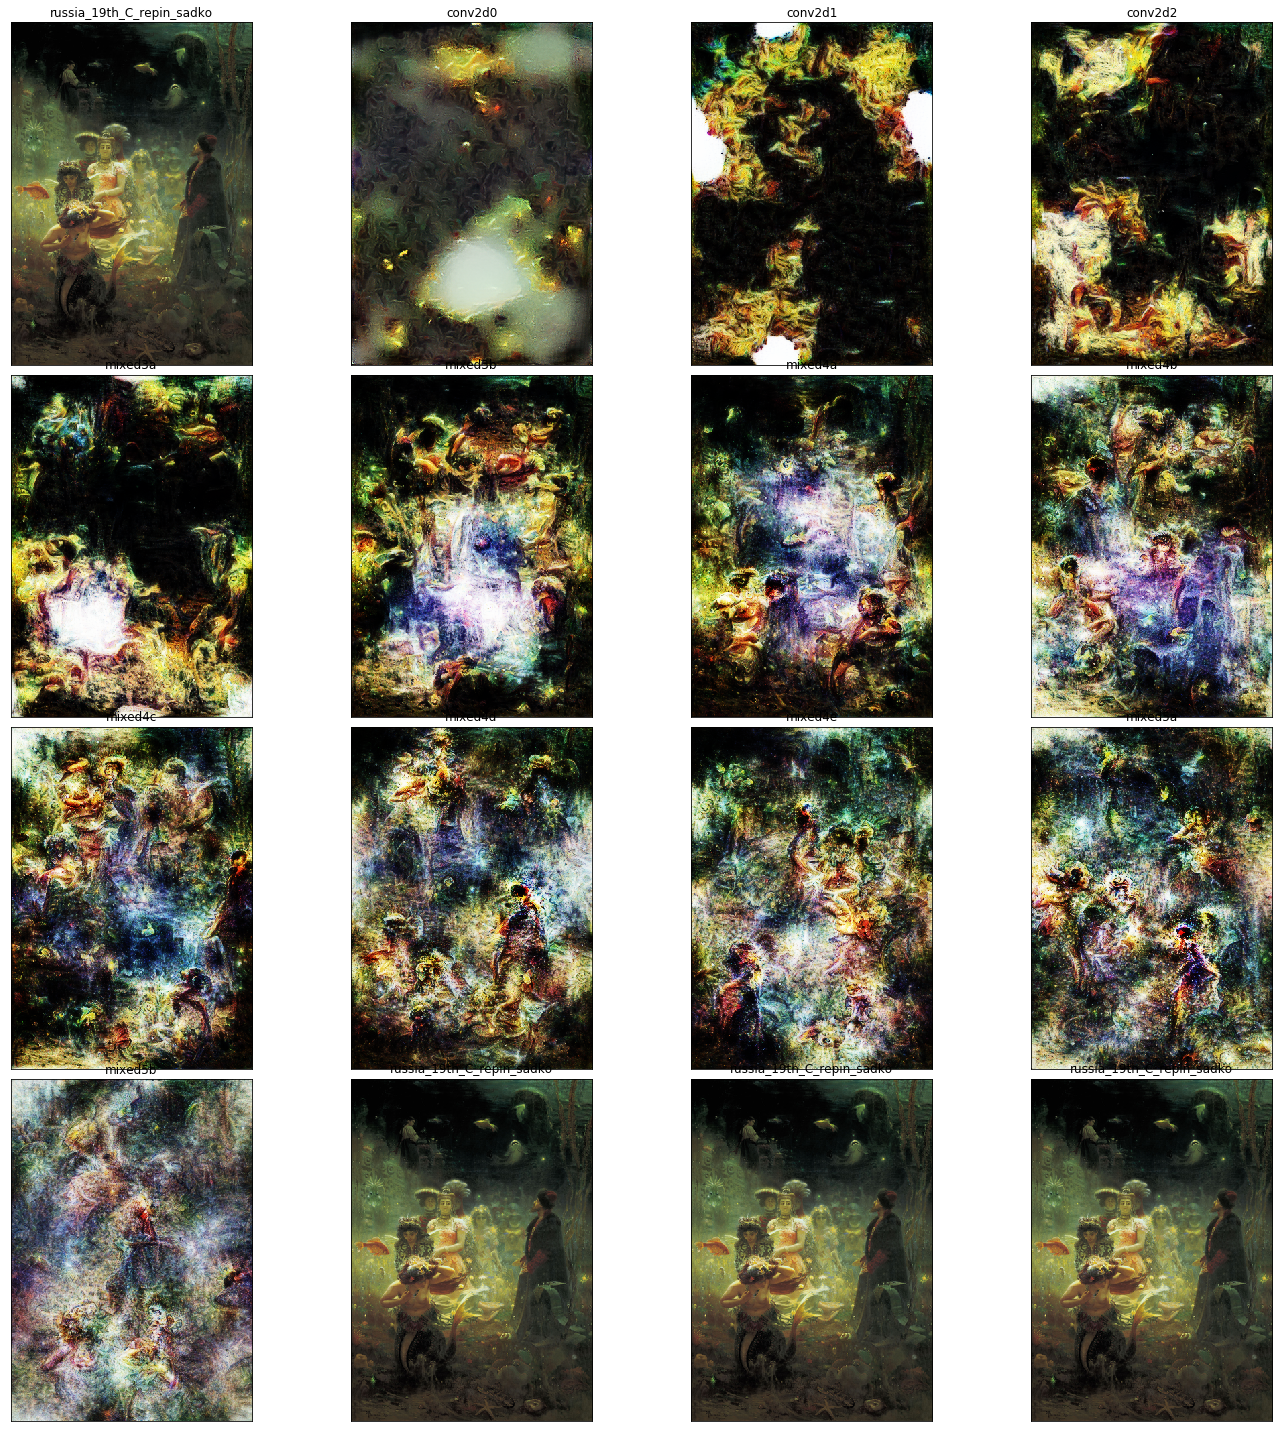

In [16]:
num_layers = len(layer_names)
ncols = 4
nrows= (num_layers-1)//ncols +1

img_width = 5 # icnhes
fig, axes = plt.subplots(nrows, ncols, figsize=(img_width*ncols, nrows*img_width))
for i in range(ncols*nrows):

    try:
        k = layer_names[i]      
    except IndexError:
        k = layer_names[0]

    v = fingerprint[k]
    if v.ndim==3:
        img = v
    else:
        img = v[0]
    ax = axes.flatten()[i]
    clean_plot(ax, img)
    ax.set_title(k)
        
plt.tight_layout(h_pad=-1)
plt.savefig(output_path)